### Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds

Since the most important step in a deep learng problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:

1. Get data ready (download from Kaggle, store, import).
2. Prepare the data (preprocessing, the 3 sets, X & y).
3. Choose and fit/train a model (TensorFlow Hub, tf.keras.applications, TensorBoard, EarlyStopping).
4. Evaluating a model (making predictions, comparing them with the ground truth labels).
5. Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).
6. Save, sharing and reloading your model (once you're happy with the results).

For preprocessing our data, we're going to use TensorFlow 2.x. The whole premise here is to get our data into Tensors (arrays of numbers which can be run on GPUs) and then allow a machine learning model to find patterns between them.

For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub.

The process of using a pretrained model and adapting it to your own problem is called transfer learning. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.

## Getting our workspace ready

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print('TF version:-', tf.__version__)
print('Hub version:-', hub.__version__)

#Check GPU
print("GPU", 'available' if tf.config.list_physical_devices("GPU") else "not available :(")

TF version:- 2.12.0
Hub version:- 0.13.0
GPU available


##Getting our data ready (turning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [ ]:
#Checkout labels of our data
import pandas as pd
labels_csv = pd.read_csv('/content/drive/MyDrive/dog-vision/labels.csv')
labels_csv.describe().T

,count,unique,top,freq
id,10222,10222,000bec180eb18c7604dcecc8fe0dba07,1
breed,10222,120,scottish_deerhound,126


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

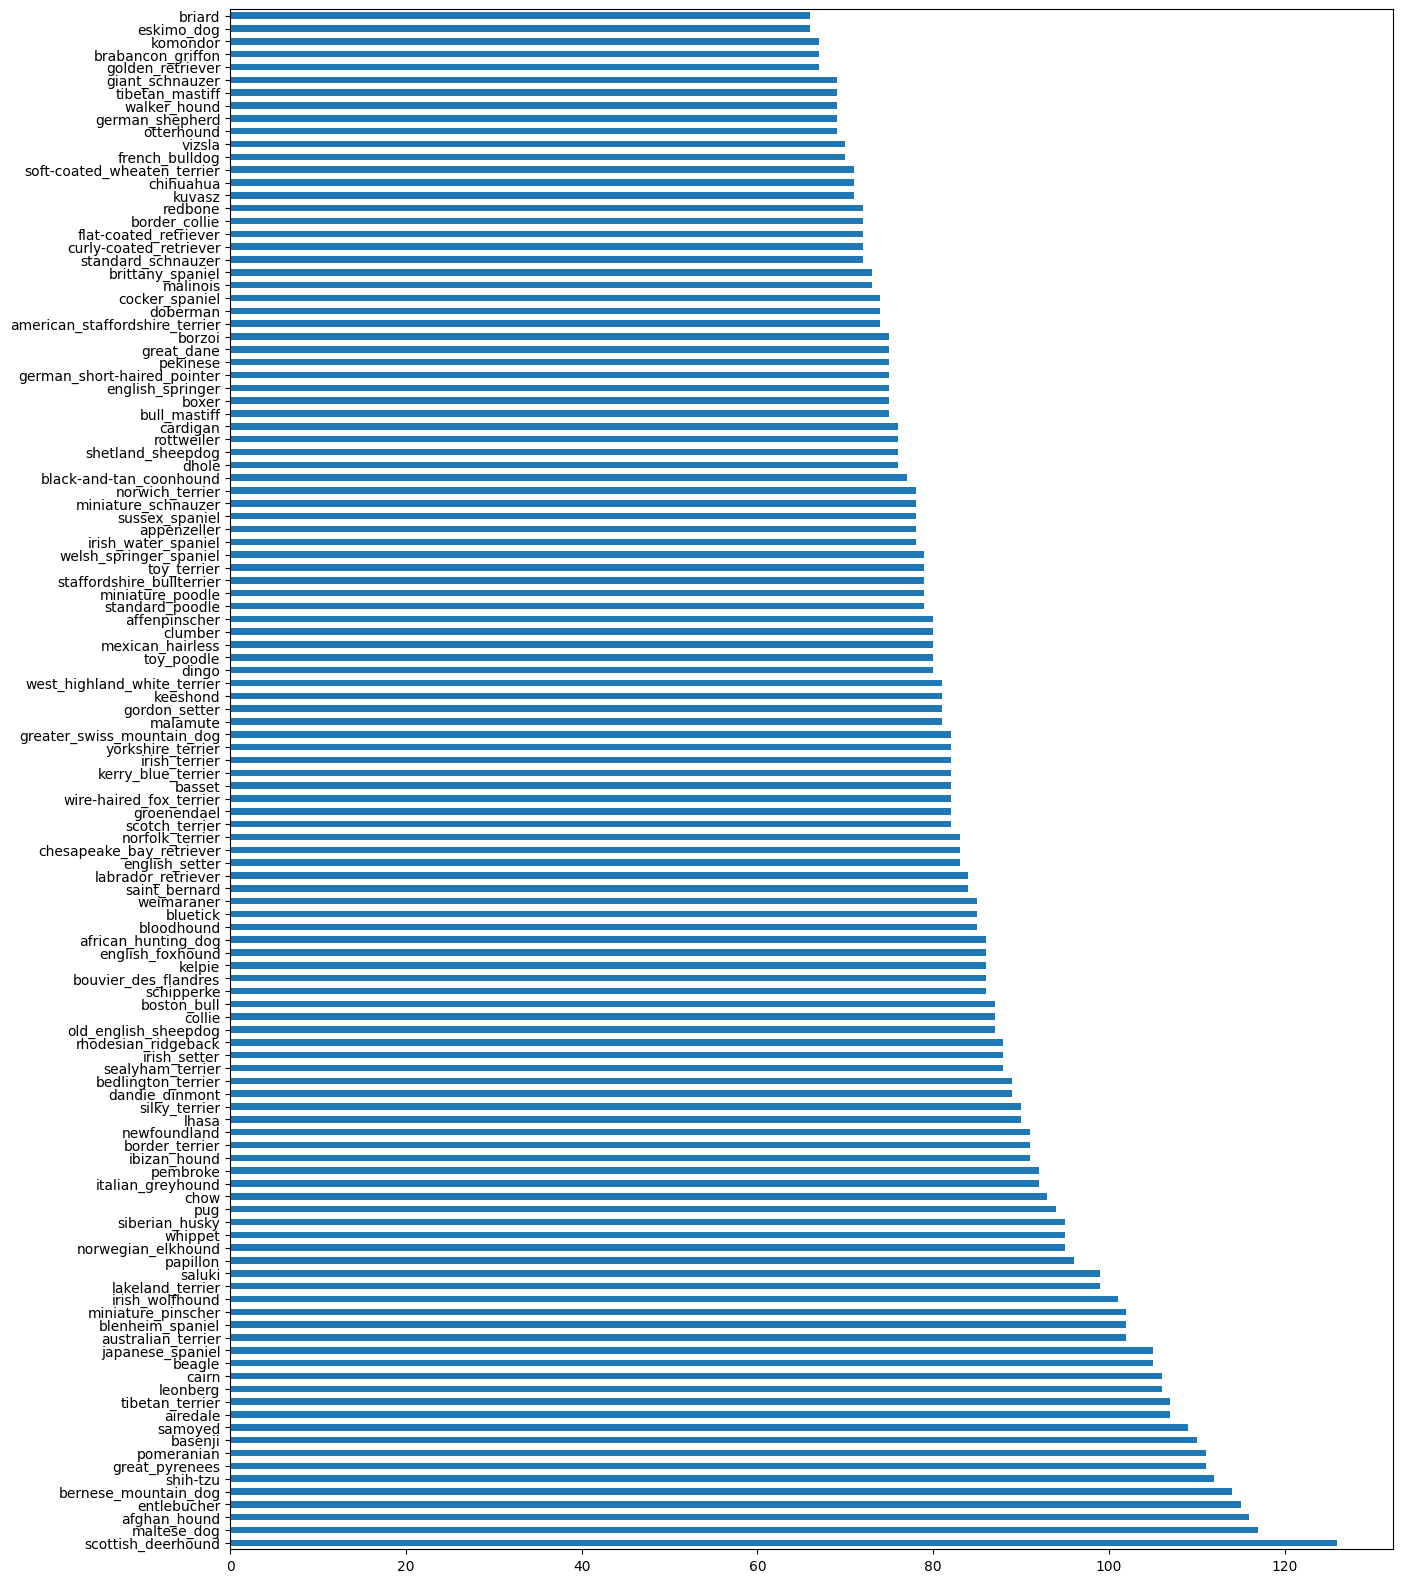

In [ ]:
## Plot All Breeds values
labels_csv['breed'].value_counts().plot.barh(figsize=(15,20))

In [ ]:
# What's the median for every breed class
labels_csv['breed'].value_counts().median()

82.0

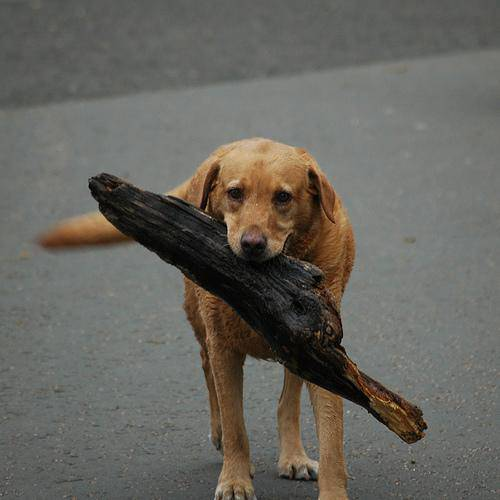

In [ ]:
#Let's view an Image
from IPython.display import Image
Image('/content/drive/MyDrive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


##Getting images and their labels
Let's get a list of all of our image file pathnames.

In [ ]:
#create pathnames from ID's
filenames = ['/content/drive/MyDrive/dog-vision/train/' + fname + '.jpg' for fname in labels_csv['id']]
filenames[:10]

['/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#Check whether filenames matches actual length of training data
import os
if len(os.listdir('/content/drive/MyDrive/dog-vision/train')) == len(filenames):
  print("length matches!!! Good to go")
else:
  print("Length Does not match")

length matches!!! Good to go


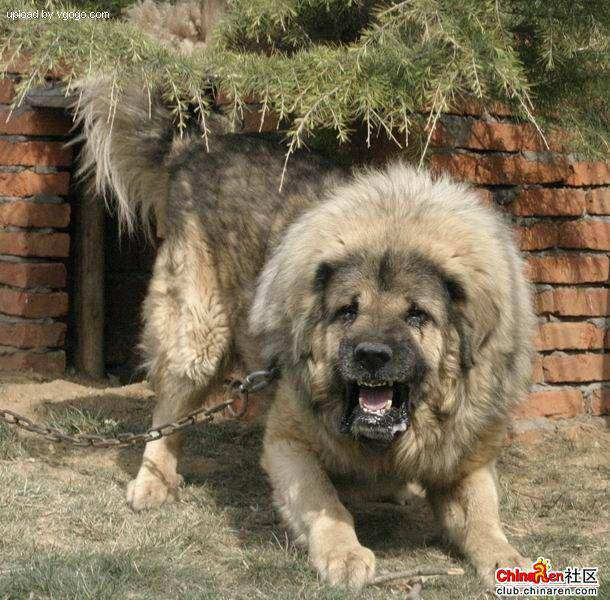

In [ ]:
#view one more
Image(filenames[9000])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
len(labels)

10222

In [ ]:
#See if the No. of labels matches the filename
if len(labels) == len(filenames):
  print("Length Matche!! Good to go")
else:
  print("Length Does Not Match")

Length Matche!! Good to go


In [ ]:
#Get the Unique labels
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#Turn every label into boolean Array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:5]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
#Turning Boolean Labels in to Integers
print(labels[0]) #Orignal Label
print(np.where(labels[0]==unique_breeds)) #index where label occurs
print(np.argmax(boolean_labels[0])) #index where label occurs in boolean labels
print(boolean_labels[0].astype(int)) #convert to integer

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


##Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [ ]:
#Setup X & y
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
#setup No. of images for Experimenting
NUM_IMAGES = 1000 #@param{type:'slider', min:1000, max:10000, step:1000} 

In [ ]:
#Let's split the Data in Training & validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]


(['/content/drive/MyDrive/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

##Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

Before we do, let's see what importing an image looks like.

In [ ]:
#Convert the image into Numpy array
from matplotlib.pyplot import imread
image =  imread(filenames[4000])
image

array([[[ 54,  42,  42],
        [ 50,  38,  38],
        [ 49,  37,  37],
        ...,
        [ 95,  85,  83],
        [ 95,  85,  83],
        [ 95,  85,  83]],

       [[ 64,  52,  52],
        [ 61,  49,  49],
        [ 61,  49,  49],
        ...,
        [ 96,  86,  84],
        [ 96,  86,  84],
        [ 96,  86,  84]],

       [[ 67,  55,  55],
        [ 66,  54,  54],
        [ 69,  57,  57],
        ...,
        [ 99,  88,  86],
        [ 99,  88,  86],
        [ 99,  88,  86]],

       ...,

       [[ 66,  52,  39],
        [ 95,  81,  68],
        [ 31,  17,   6],
        ...,
        [ 32,  21,  17],
        [ 31,  20,  16],
        [ 31,  20,  16]],

       [[111,  97,  84],
        [116, 102,  89],
        [ 81,  67,  56],
        ...,
        [ 31,  20,  16],
        [ 31,  20,  16],
        [ 32,  21,  17]],

       [[112,  98,  85],
        [106,  92,  79],
        [165, 151, 140],
        ...,
        [ 30,  19,  15],
        [ 31,  20,  16],
        [ 32,  21,  17]]

In [ ]:
image.shape, image.max(), image.min()

((375, 500, 3), 255, 0)

In [ ]:
#turn an image into tensor
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 54,  42,  42],
        [ 50,  38,  38],
        [ 49,  37,  37],
        ...,
        [ 95,  85,  83],
        [ 95,  85,  83],
        [ 95,  85,  83]],

       [[ 64,  52,  52],
        [ 61,  49,  49],
        [ 61,  49,  49],
        ...,
        [ 96,  86,  84],
        [ 96,  86,  84],
        [ 96,  86,  84]],

       [[ 67,  55,  55],
        [ 66,  54,  54],
        [ 69,  57,  57],
        ...,
        [ 99,  88,  86],
        [ 99,  88,  86],
        [ 99,  88,  86]],

       ...,

       [[ 66,  52,  39],
        [ 95,  81,  68],
        [ 31,  17,   6],
        ...,
        [ 32,  21,  17],
        [ 31,  20,  16],
        [ 31,  20,  16]],

       [[111,  97,  84],
        [116, 102,  89],
        [ 81,  67,  56],
        ...,
        [ 31,  20,  16],
        [ 31,  20,  16],
        [ 32,  21,  17]],

       [[112,  98,  85],
        [106,  92,  79],
        [165, 151, 140],
        ...,
        [ 30,  19,  1

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
IMG_SIZE = 224 #image size
def process_image(image_path):
  image = tf.io.read_file(image_path) #read image file
  image = tf.image.decode_jpeg(image, channels=3) 
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
image = tf.io.read_file(filenames[4000])
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

In [ ]:
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.20928796, 0.17007226, 0.16615069],
        [0.21515968, 0.17594399, 0.17202242],
        [0.1936899 , 0.15447421, 0.15055265],
        ...,
        [0.3534839 , 0.33387604, 0.31818977],
        [0.37387082, 0.3385767 , 0.31896886],
        [0.37387082, 0.3385767 , 0.31896886]],

       [[0.2545788 , 0.21536312, 0.20751998],
        [0.26913515, 0.2299195 , 0.22207636],
        [0.2321185 , 0.19290282, 0.18505967],
        ...,
        [0.33031332, 0.30976015, 0.29438898],
        [0.3811559 , 0.34459695, 0.32562152],
        [0.38449898, 0.34128082, 0.32562152]],

       [[0.21022934, 0.16832632, 0.16048318],
        [0.22209033, 0.18018731, 0.17234418],
        [0.23538475, 0.19348173, 0.18563859],
        ...,
        [0.31278297, 0.28481564, 0.27191585],
        [0.40682778, 0.35562852, 0.34262955],
        [0.41000405, 0.35486814, 0.34262955]],

       ...,

       [[0.37405425, 0.32699543, 0.27209347],
        [0.38

#Creating data batches

In [ ]:
#Simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
# Define batch size
BATCH_SIZE = 32 
def create_data_batch(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batch(X_train, y_train)
val_data = create_data_batch(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#Visualizing data batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+ 1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

In [ ]:
train_images, train_labels =next(train_data.as_numpy_iterator())


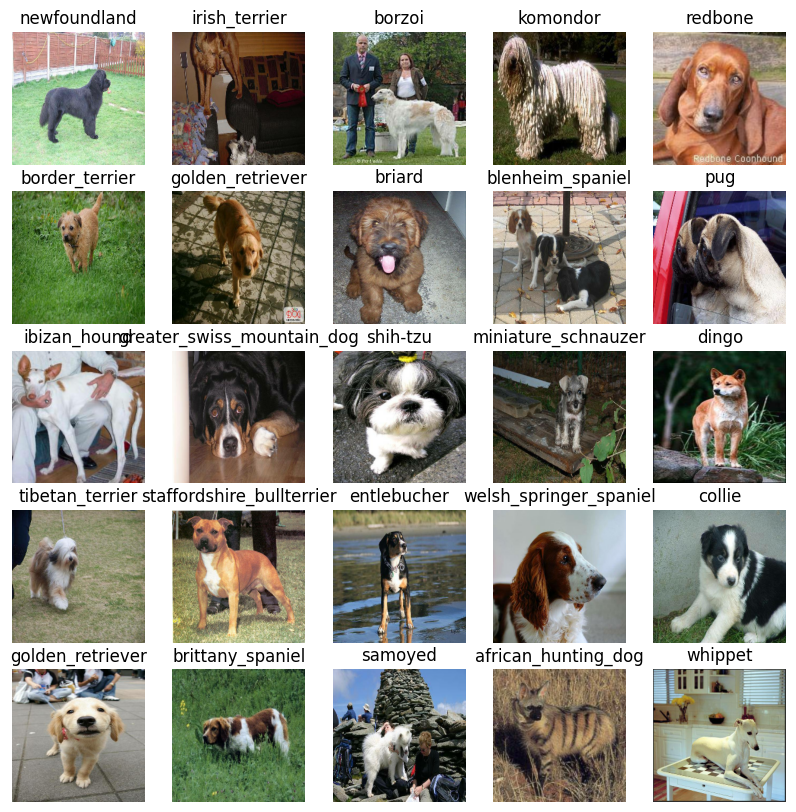

In [ ]:
show_25_images(train_images, train_labels)

#Building a model
Before we build a model, there are a few things we need to define:

1. The input shape (images, in the form of Tensors) to our model.
2. The output shape (image labels, in the form of Tensors) of our model.
3. The URL of the model we want to use.

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] 
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


#Creating callbacks
We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize the our models training logs using the %tensorboard magic function (we'll do this later on).

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
# How many rounds should we get the model to look through the data
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [ ]:
# Fit the model to the data
'''model = train_model()'''

'model = train_model()'

#Saving and reloading a model
After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.

The format of an entire saved Keras model is h5. So we'll make a function which can take a model as input and utilise the save() method to save it as a h5 file to a specified directory.

In [ ]:
def save_model(model, suffix=None):
  model_dir = os.path.join('/content/drive/MyDrive/models/',
                           datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  model_path = model_dir + '-' + suffix + '.h5'
  print('Saving model')
  model.save(model_path)
  return model_path

In [ ]:
#save_model(model, '1000Images')

Saving model


'/content/drive/MyDrive/models/20230603-103408-1000Images.h5'

If we've got a saved model, we'd like to load it, let's create a function which can take a model path and use the tf.keras.models.load_model() function to load it into the notebook.

In [ ]:
def load_model(model_path):
  print(f'Loading saved model from -> {model_path} ')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('/content/drive/MyDrive/models/20230603-061200-1000Images.h5')

Loading saved model from -> /content/drive/MyDrive/models/20230603-061200-1000Images.h5 


#Checking the TensorBoard logs

In [ ]:
%tensorboard --logdir /content/drive/MyDrive

<IPython.core.display.Javascript object>

#Making and evaluating predictions using a trained model

In [ ]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 237s 36s/step


array([[8.6646620e-03, 2.6555667e-03, 1.0816474e-03, ..., 3.7420013e-03,
        1.5143327e-02, 5.6191173e-04],
       [1.6794613e-03, 1.3881083e-02, 3.3874130e-03, ..., 2.5277607e-02,
        5.1460811e-03, 1.0232342e-02],
       [6.2570046e-04, 3.4234440e-04, 4.3947003e-03, ..., 7.4665928e-05,
        4.3259375e-03, 4.2646774e-03],
       ...,
       [2.3508104e-03, 1.5281616e-03, 3.3888824e-03, ..., 2.0317500e-03,
        3.4362942e-02, 1.9003395e-03],
       [2.4661496e-03, 2.9215675e-03, 9.2618568e-03, ..., 1.9376701e-03,
        1.1061336e-02, 4.0615578e-03],
       [3.2739257e-03, 8.4194465e-04, 2.2601113e-03, ..., 4.2653950e-03,
        4.4854544e-03, 1.7978100e-03]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
# First prediction
index = 0 
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[index])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[index])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}") # the predicted label

[8.66466202e-03 2.65556667e-03 1.08164735e-03 2.04500067e-03
 1.23606613e-02 5.98585291e-04 5.67973882e-04 1.37204556e-02
 8.25631490e-04 1.83751900e-03 4.59735841e-03 9.29838493e-02
 2.58570048e-03 4.90712142e-03 2.02822685e-02 9.29844007e-03
 2.51236628e-03 3.68759589e-04 1.08933933e-02 8.13624635e-03
 4.65102307e-02 1.30853371e-03 5.65185817e-03 4.21452860e-04
 7.47669896e-04 6.33491087e-04 1.04765990e-03 1.78467482e-03
 2.18765141e-04 1.63985249e-02 3.28397634e-03 1.99544709e-03
 1.06572853e-02 2.88747419e-02 1.73042268e-02 6.95773261e-03
 1.61868613e-03 5.04290627e-04 6.06724294e-04 3.46932933e-03
 1.27195520e-02 7.02220201e-03 2.45395978e-03 3.89486481e-03
 8.96534184e-04 4.63641323e-02 1.01594413e-02 8.96916445e-03
 1.82310026e-03 1.19111442e-03 2.37079579e-02 8.73495173e-03
 7.36522162e-03 1.95841817e-03 8.66542570e-03 2.98200874e-04
 2.94947252e-03 3.58306593e-03 2.60529271e-03 3.02949874e-03
 1.31073012e-03 1.04308221e-02 4.06430149e-03 9.62624850e-04
 1.25671849e-01 1.194565

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilites):
  return unique_breeds[np.argmax(prediction_probabilites)]
pred_label = get_pred_label(predictions[1])
pred_label

'norfolk_terrier'

In [ ]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

#Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

1. Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
2. Convert the prediction probabilities to a predicted label.
3. Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, images, labels, n=1):
   pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

   pred_label = get_pred_label(pred_prob)
   plt.imshow(image)
   plt.xticks([])
   plt.yticks([])
   # Change the color of the title depending on if the prediction is right or wrong
   if pred_label == true_label:
     color = "green"
   else:
     color = "red"

   plt.title("{} {:2.0f}% ({})".format(pred_label,
                                       np.max(pred_prob)*100,
                                       true_label),
                                       color=color)



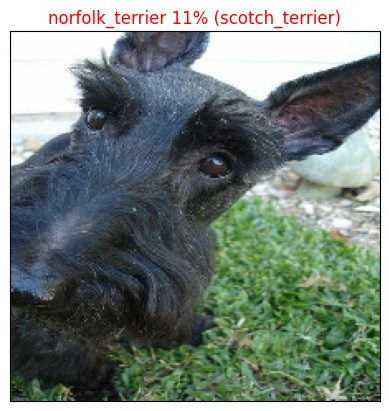

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


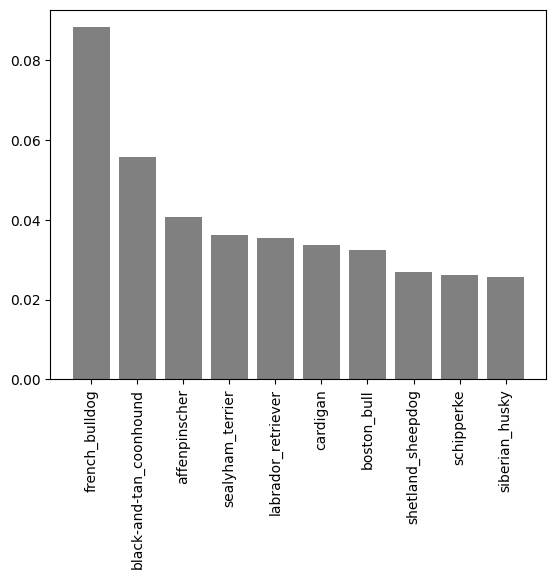

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

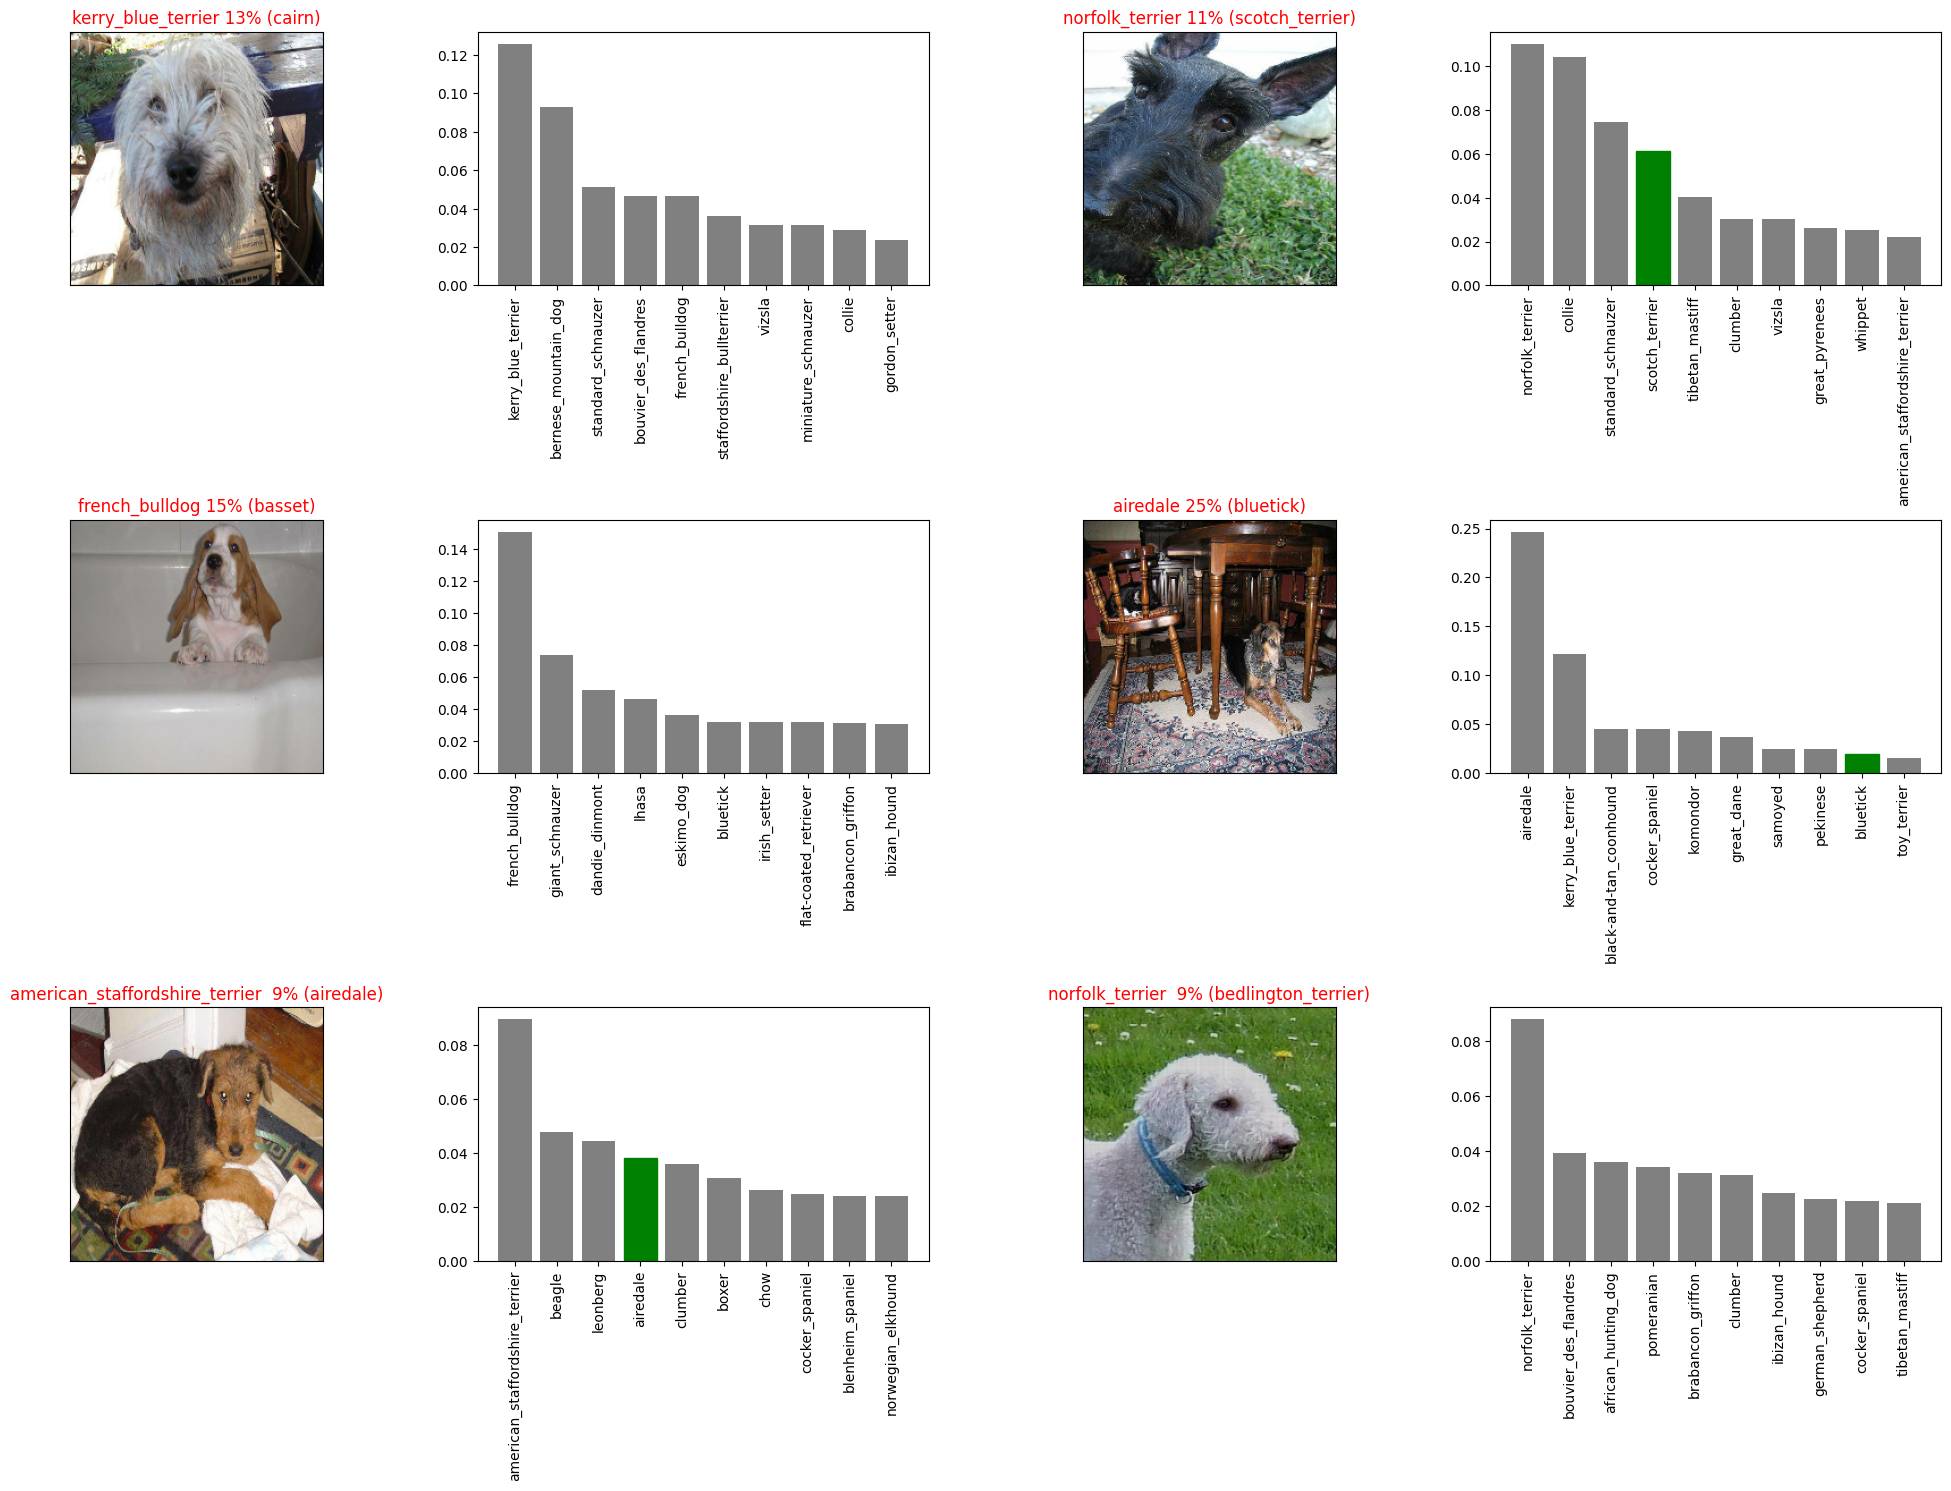

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

Training a model (on the full data)

In [ ]:
# Turn full training data in a data batch
full_data = create_data_batch(X, y)

Creating training data batches...


In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 69s 193ms/step - loss: 1.3494 - accuracy: 0.6698
Epoch 2/100
320/320 [==============================] - 45s 141ms/step - loss: 0.4031 - accuracy: 0.8814
Epoch 3/100
320/320 [==============================] - 48s 151ms/step - loss: 0.2361 - accuracy: 0.9358
Epoch 4/100
320/320 [==============================] - 57s 178ms/step - loss: 0.1537 - accuracy: 0.9630
Epoch 5/100
320/320 [==============================] - 42s 133ms/step - loss: 0.1073 - accuracy: 0.9769
Epoch 6/100
320/320 [==============================] - 49s 154ms/step - loss: 0.0774 - accuracy: 0.9855
Epoch 7/100
320/320 [==============================] - 52s 161ms/step - loss: 0.0576 - accuracy: 0.9929
Epoch 8/100
320/320 [==============================] - 50s 156ms/step - loss: 0.0463 - accuracy: 0.9938
Epoch 9/100
320/320 [==============================] - 49s 153ms/step - loss: 0.0375 - accuracy: 0.9958
Epoch 10/100
320/320 [==============================] - 47s 147m

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images-dogs")

Saving model


'/content/drive/MyDrive/models/20230603-113635-all-images-dogs.h5'

In [ ]:
# Load in the full model
loaded_full_model = load_model('/content/drive/MyDrive/models/20230603-113635-all-images-dogs.h5')

Loading saved model from -> /content/drive/MyDrive/models/20230603-113635-all-images-dogs.h5 


In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "/content/drive/MyDrive/dog-vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/content/drive/MyDrive/dog-vision/test/e2b4d6b6590fa2941e74238248093eb3.jpg',
 '/content/drive/MyDrive/dog-vision/test/e4b7ff61849485992246c0f2ab7e8804.jpg',
 '/content/drive/MyDrive/dog-vision/test/e2b808864a5253fd356a9032915447a1.jpg',
 '/content/drive/MyDrive/dog-vision/test/e6d6ff5b33e6174158d5ab05a7eda95c.jpg',
 '/content/drive/MyDrive/dog-vision/test/e683ba5a138de0fbb7bb1523862b43f2.jpg',
 '/content/drive/MyDrive/dog-vision/test/dcc047e682db75bbcebdec2288192f1d.jpg',
 '/content/drive/MyDrive/dog-vision/test/de3fbd6fb5444fcf14390ac90545c2f1.jpg',
 '/content/drive/MyDrive/dog-vision/test/e145bbebb9ad1e740256e460899a6b67.jpg',
 '/content/drive/MyDrive/dog-vision/test/ddfb44a70822741297344d0a9ea81f2d.jpg',
 '/content/drive/MyDrive/dog-vision/test/e12e6997c15c233c7b92209e08ff9d14.jpg']

In [ ]:
test_data = create_data_batch(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

  6/324 [..............................] - ETA: 1:03:00

KeyboardInterrupt: ignored

In [ ]:
test_images, test_labels = unbatchify(test_data)

In [ ]:
plot_pred_conf(prediction_probabilities=test_predictions,
               labels=test_labels,
               n=9)